In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [ ]:
df = pd.read_csv('PredictionData.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataset shape: (6007, 32)
Columns: {df.columns.tolist()}


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


Checking Data

In [4]:
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nCustomer Status distribution:")
print(df['Customer_Status'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Onli

Handling Values

In [5]:
def load_and_preprocess_data():
    # Create binary target variable (1 for Churned, 0 for Stayed)
    df['Churn'] = (df['Customer_Status'] == 'Churned').astype(int)
    
    # Select relevant features for modeling
    feature_columns = [
        'Gender', 'Age', 'Married', 'Number_of_Referrals', 'Tenure_in_Months',
        'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
        'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support',
        'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
        'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
        'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
        'Total_Long_Distance_Charges', 'Total_Revenue'
    ]
    
    # Create feature matrix
    X = df[feature_columns].copy()
    y = df['Churn']
    
    # Handle categorical variables
    categorical_columns = X.select_dtypes(include=['object']).columns
    label_encoders = {}
    
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
    
    # Handle missing values
    X = X.fillna(X.median())
    
    return X, y, label_encoders, feature_columns


Preprocess the data

In [6]:
X, y, label_encoders, feature_columns = load_and_preprocess_data()
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")


Feature matrix shape: (6007, 26)
Target variable shape: (6007,)
Target distribution:
Churn
0    4275
1    1732
Name: count, dtype: int64


Splitting the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")


Training set shape: (4805, 26)
Test set shape: (1202, 26)
Training target distribution:
Churn
0    3420
1    1385
Name: count, dtype: int64


Smote for handling class imbalance 

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"SMOTE training set shape: {X_train_smote.shape}")
print(f"Original target distribution:\n{y_train.value_counts()}")
print(f"SMOTE target distribution:\n{pd.Series(y_train_smote).value_counts()}")


Original training set shape: (4805, 26)
SMOTE training set shape: (6840, 26)
Original target distribution:
Churn
0    3420
1    1385
Name: count, dtype: int64
SMOTE target distribution:
Churn
0    3420
1    3420
Name: count, dtype: int64


Scaling features

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")


Scaled training set shape: (6840, 26)
Scaled test set shape: (1202, 26)


Training Model

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_scaled, y_train_smote)
print("Model training completed!")


Model training completed!


Model Performance

In [26]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

print("Model Performance:")
print(f"Accuracy: {(accuracy_score(y_test, y_pred))*100:.4f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Performance:
Accuracy: 83.1947%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       855
           1       0.70      0.73      0.71       347

    accuracy                           0.83      1202
   macro avg       0.79      0.80      0.80      1202
weighted avg       0.83      0.83      0.83      1202


Confusion Matrix:
[[747 108]
 [ 94 253]]


Feature importance

Top 10 Important Features:
                        feature  importance
17                     Contract    0.278397
25                Total_Revenue    0.100331
21                Total_Charges    0.098280
20               Monthly_Charge    0.083888
24  Total_Long_Distance_Charges    0.064477
9               Online_Security    0.054112
12              Premium_Support    0.048358
8                 Internet_Type    0.045733
19               Payment_Method    0.044964
1                           Age    0.030628


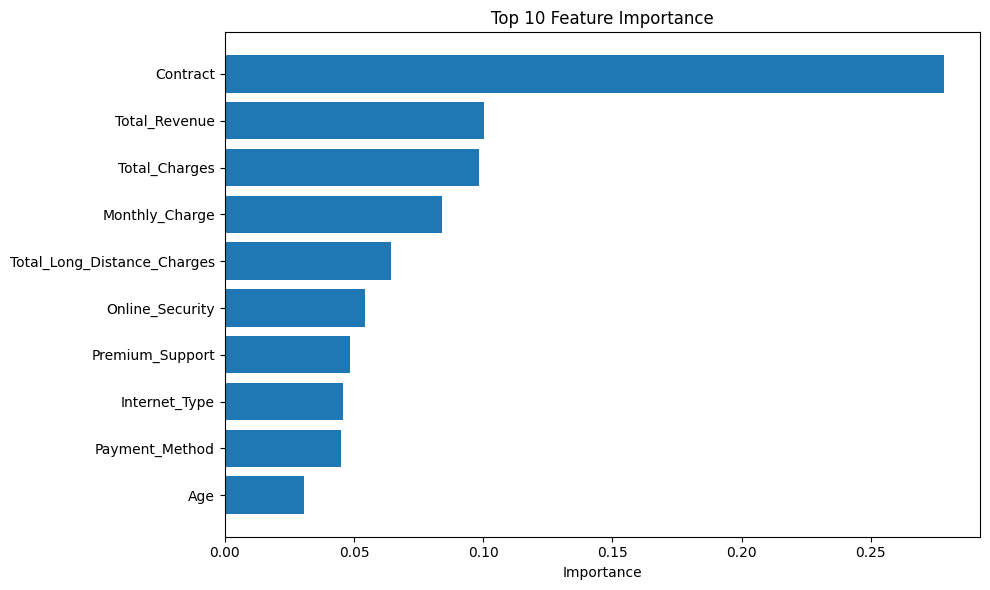

In [ ]:
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance.head(10))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Saving models

In [ ]:
joblib.dump(rf_model, 'churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')



['feature_columns.pkl']

Testing the model

In [ ]:
sample_data = X_test.iloc[0:1]  # Take first row from test set
sample_scaled = scaler.transform(sample_data)
prediction = rf_model.predict(sample_scaled)
prediction_proba = rf_model.predict_proba(sample_scaled)

print("Sample Prediction:")
print(f"Input data shape: {sample_data.shape}")
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'Stay'}")
print(f"Probability of Churn: {prediction_proba[0][1]:.4f}")
print(f"Probability of Stay: {prediction_proba[0][0]:.4f}")


Sample Prediction:
Input data shape: (1, 26)
Prediction: Stay
Probability of Churn: 0.0162
Probability of Stay: 0.9838


Making prediction on tatal dataset

In [ ]:

X_full_scaled = scaler.transform(X)
full_predictions = rf_model.predict(X_full_scaled)
full_predictions_proba = rf_model.predict_proba(X_full_scaled)

df_with_predictions = df.copy()
df_with_predictions['Predicted_Churn'] = full_predictions
df_with_predictions['Churn_Probability'] = full_predictions_proba[:, 1]

print(f"Total customers: {len(df_with_predictions)}")
print(f"Predicted churned customers: {sum(full_predictions)}")
print(f"Predicted churn rate: {(sum(full_predictions)/len(df_with_predictions))*100:.2f}%")

Total customers: 6007
Predicted churned customers: 1886
Predicted churn rate: 31.40%


Saving new csv file for predicted data

In [23]:
# Filter customers predicted to churn
predicted_churned_customers = df_with_predictions[df_with_predictions['Predicted_Churn'] == 1].copy()

print(f"Number of customers predicted to churn: {len(predicted_churned_customers)}")
print(f"Average churn probability: {predicted_churned_customers['Churn_Probability'].mean():.3f}")

# Save predicted churned customers to CSV
predicted_churned_customers.to_csv('predicted_churned_customers.csv', index=False)
print("Predicted churned customers data saved to 'predicted_churned_customers.csv'")

# Display sample of predicted churned customers
print("\nSample of Predicted Churned Customers:")
print(predicted_churned_customers[['Customer_ID', 'Age', 'Monthly_Charge', 'Tenure_in_Months', 
                                   'Churn_Probability', 'Customer_Status']].head(10))

Number of customers predicted to churn: 1886
Average churn probability: 0.784
Predicted churned customers data saved to 'predicted_churned_customers.csv'

Sample of Predicted Churned Customers:
   Customer_ID  Age  Monthly_Charge  Tenure_in_Months  Churn_Probability  \
1    11114-PUN   51       49.150002                 9           0.918185   
8    11262-HAR   73       95.099998                32           0.995994   
10   11264-MAH   27       -4.000000                17           0.980707   
11   11272-UTT   65       75.849998                19           0.966269   
14   11290-JAM   70       95.449997                36           0.900276   
26   11472-PUN   33       55.400002                 6           0.994407   
27   11474-TEL   59       75.599998                18           0.512097   
28   11510-KER   46       95.900002                 4           0.543161   
30   11540-DEL   63      104.099998                15           0.543981   
32   11543-WES   35       49.400002           